In [1]:
import os
import subprocess as subp
import numpy as np
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import argparse
import matplotlib.colors as colors
from scipy import ndimage   
import time, math
from IPython.display import Image  
#! In the lab I need to use basic_mf but at home basic_mf_v2, since 15th July
sys.path.append(os.path.abspath('..'))
import common_functions_feb2018_modthesis as cmf2018
import matplotlib.colors as mlcolors
from scipy.special import binom
import itertools
import ast
%matplotlib inline

In [2]:
mpl.rcParams['font.size']=14
figsdir='../figs2/'

In [3]:
program_name="electricG_v1.c"

parlist_names_ordered=["Krg", "nrg", "alpha_Rg", "delta_Rg", "alpha_rRg", "a_fl", "a_dif", "gamma_dif", "gamma_fl", "std_ic","Gi01", "Gi02", "Kgt", "dperturbK", "tperturbK", "K_perturb", "tperturbG", "GE_perturb", "V0_tht", "g_tht", "dl", "alpha_t", "gamma_t",  "stopflow1", "stopflow2", "dx", "tt", "dt", "st", "zero_tol", "gv", "Radius2", "Radius1", "freeze", "mk", "Ikmax", "gl", "gk", "fl_Gext", "V0", "Dg", "F", "Pgrow", "alpha_gt", "freeze2", "tprint", "Dp", "Sth", "K_media", "a0", "GE", "center1", "delta_g", "center2", "seed_", "GS0", "b", "read_input", "S0", "Vk", "Vl", "Dke", "unfreeze", "gamma_s", "ug", "fl_Ekext", "Ls", "dist_pK", "alpha_sv"]





print len(parlist_names_ordered)
cmf2018.compile_only(program_name=program_name)
if True: #when writing the parmaeter list in the model file
    print ', '.join(parlist_names_ordered)
    names_=['&'+x for x in parlist_names_ordered]
    print ', '.join(names_)
    

69
PROG = Chen_etal_inC

['PROG = electricG_v1\n', 'MAINOBJ = $(PROG).o\n', 'MAINSRC = $(PROG).c\n', '\n', 'CC = gcc \n', '#CC = gcc-4.2\n', '#CFLAGS = -DDEBUG -Wall -O3 \n', 'CFLAGS = -Wall -O3 -std=gnu99 -fnested-functions\n', '#OPTS = -lm  -lfftw3 -lgsl -lgslcblas -I/opt/local/include/ -I/usr/local/include/gsl/ -L/usr/local/lib/\n', '#OPTS = -lm  -lfftw3 -lgsl -lgslcblas -I/usr/include/ -I/usr/include/gsl/ -L/usr/lib/\n', '#OPTS = -lgslcblas -I/share/apps/include/ -L/share/apps/lib/\n', '#OPTS = -I/opt/local/include/ -I/export/apps/include/ -L/opt/local/lib -I/usr/local/include \n', '#RMC added -L in above command, and -I/usr/local/include when uninstalling macports\n', 'OPTS = -I/opt/local/include/ -I/export/apps/include/ -L/usr/local/lib \n', '#RMC above after uninstalling xcode\n', 'LIBS = -lm -lgsl -lgslcblas \n', '\n', 'all: $(MAINOBJ)\n', '\t$(CC) $(CFLAGS) $(OPTS) $(MAINOBJ) -o $(PROG) $(LIBS) \n', '\n', '$(MAINOBJ):\t$(MAINSRC)\n', '\t$(CC) $(CFLAGS) $(OPTS) -c $(MAINSRC)\n'

In [4]:
cmap_ThT=mpl.colors.LinearSegmentedColormap.from_list('mycmap2',['#eff9f9','#136ca0']) 

def plot_kpulse(rs, tperturbK=6, dperturbK=0.1, tt=24, st=0.1):
    #rs must be [v,s]
    stpoints=np.arange(len(rs[0]))


    xticks=np.arange(0,Ls+1,50)
    xticklab=['%d'%x for x in xticks*10] #in um
    dt=0.5
    yticklab=np.arange(0,tt+2,dt)
    yticks=yticklab/st
    yticklab=['%g'%x for x in yticklab]

    titles=['membrane\npotential','stress']
    #fig,axes=plt.subplots(1,2,figsize=(6,3.5),sharey=True)
    fig,axes=plt.subplots(1,2,figsize=(10,6),sharey=True)
    #fig.suptitle(outdir,y=1.05)


    ax=axes[0]
    kym=rs[0]
    ax.set_title(titles[0],fontsize=14)
    tf=7
    ti=6
    dt=0.5
    limits=[int(ti/dt),int(tf/dt)]
    print(limits)
    kym_=kym[int(ti/st):int(tf/st)]
    yticklab=yticklab[limits[0]:limits[1]]
    print(yticks)
    yticks=yticks[limits[0]:limits[1]]
    print(yticks)
    yticks=yticks-yticks[0]
    print(yticks)

    im=ax.imshow(kym_,aspect='auto',cmap=cmap_ThT,origin='lower')
    cb=plt.colorbar(im,ax=ax)
    cb.ax.set_ylabel('$ThT$ (a.u.)',useTex=True,fontsize=14)

    #for i in [3,4,5,6]:
    #ax=axes[(i-1)//2][(i-1)%2]
    #kym=rs[i]
    ax=axes[1]
    kym=rs[1]
    kym_=kym[int(ti/st):int(tf/st)]
    im=ax.imshow(kym_,aspect='auto',cmap=plt.cm.Greys,origin='lower')
    cb=plt.colorbar(im,ax=ax)
    #cb.ax.set_ylabel('%s'%names[1],useTex=True,fontsize=14)
    ax.set_title(titles[1],fontsize=14)
    #for row in axes:
        #for ax in row:
    for ax in axes:
        ax.scatter(edges[:,1][int(ti/st):int(tf/st)],np.arange(len(edges[:,1][int(ti/st):int(tf/st)])),color='k',s=2)
        ax.set_xticks(xticks)
        ax.set_xticklabels(xticklab,rotation=45)
        ax.set_xlabel(r'space ($\mathrm{\mu m}$)')
        ax.set_xlim(0,100)
        ax.fill_between(x=np.arange(50,100),y1=(tperturbK/st)-(ti/st),y2=(tperturbK/st)-(ti/st)+(dperturbK/st),color='Orange')

    ax=axes[0]
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklab)

    ax.set_ylabel('time (h)')
    #ax.set_ylim([5.5/st,8/st]) #yticks[-1]])

    fig.text(0,1,'C',fontsize=16)
    fig.text(0.45,1,'Model')
    plt.tight_layout()
    #plt.savefig(os.path.join(figsdir,'kyms_Kpulse.pdf'),bbox_inches='tight')
    plt.show()
    #Ek=rs[1][stpoints,edges[:,1]]
    #ThT=rs[2][stpoints,edges[:,1]]
    #plt.plot(Ek-8,label='Ek')
    #plt.plot(ThT,label='ThT')
    #plt.legend()
    #    plt.show()

GE 30
done in 387.25383091 s
electric_sims
Getting c
# 200 480
wall!


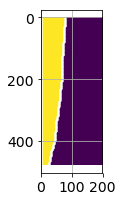

Getting g
# 200 480
Getting gi
# 200 480
Getting Rg
# 200 480
Getting s
# 200 480
Getting nk
# 200 480
Getting Ek
# 200 480
Getting Ik
# 200 480
Getting tht
# 200 480
Getting v
# 200 480
nrows 3


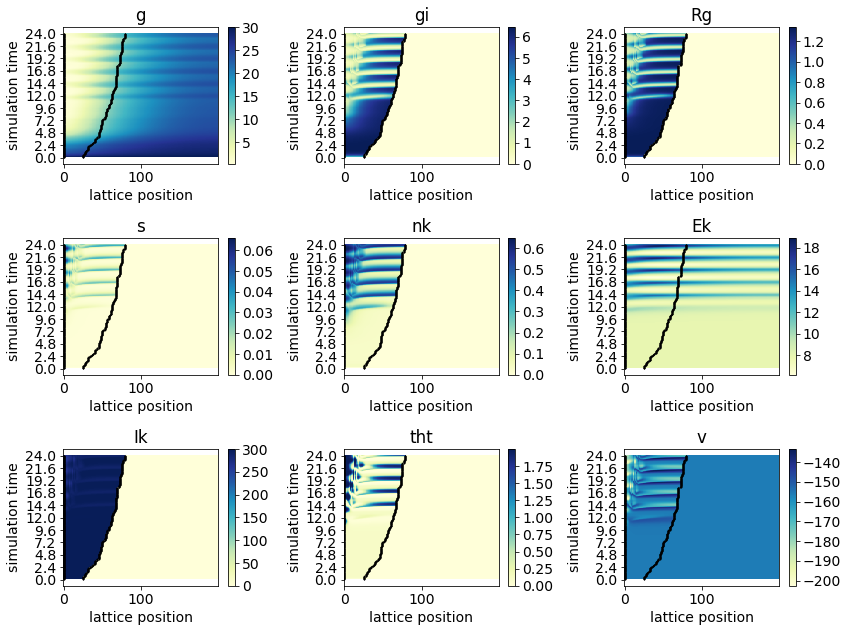

wsize is 200 wsize_h is 100


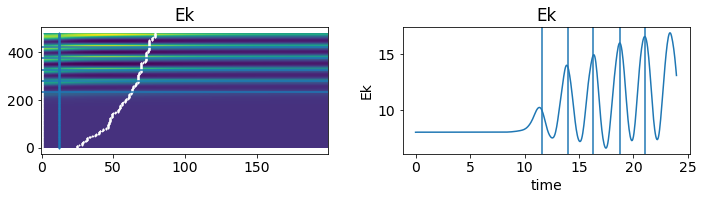

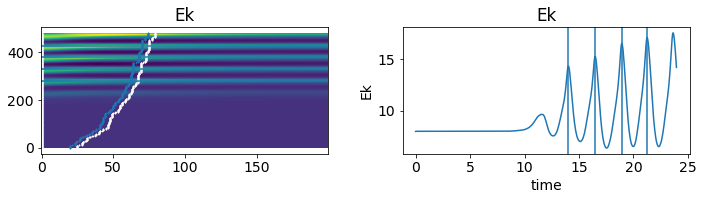

gr 200


/Users/rosamartinezcorral/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


gr 200


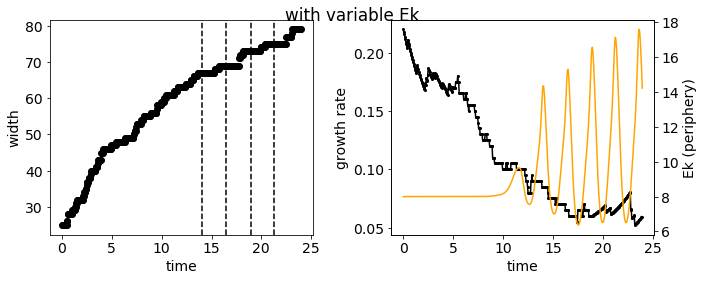

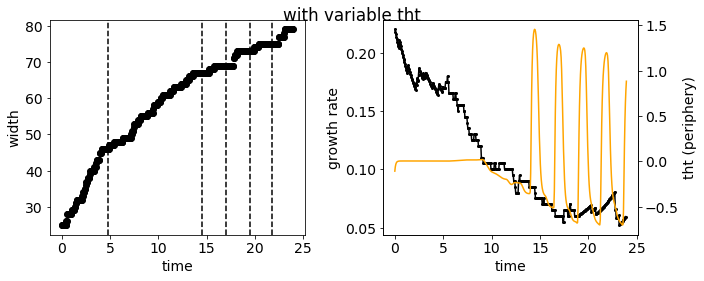

Getting c
# 200 480
Getting Ek
# 200 480
Getting tht
# 200 480
Getting v
# 200 480


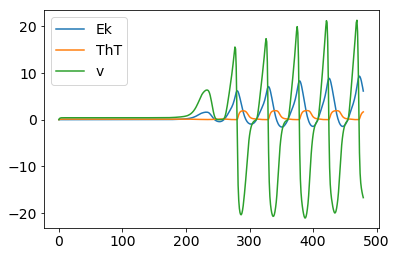

In [6]:
#reference parameters


for GE in [30]:
    print 'GE', GE
    i=1
    Ls=200
    dx=1
    pars_setup={
        "Ls":Ls,
        "Radius1":25,
        "center1":0,
        "Radius2":0,
        "center2":Ls,
        "freeze":0,
        "unfreeze":0.1,
        "freeze2":50,
        "dx":dx,
        "st":0.05,
        "tt":24,
        "zero_tol":0.05,
        "dt":0.000005,
        "read_input":-1.0,
        "tprint":50,
        "seed_":i,
    }
    pars_flow={
        "fl_Gext":5,
        "fl_Ekext":5,
        "K_media":8,
        "GE":GE,
        "stopflow1":50,
        "stopflow2":50,
        "tperturbG":50,
        "tperturbK":30,
        "dperturbK":0.05,
        "K_perturb":30,
        "dist_pK":0,
        "GE_perturb":0.5,
    }


    pars_list=[('Dg', 36000), ('alpha_gt', 24), ('Kgt', 0.75), ('gv', 1), ('V0', -150), 
               ('delta_g', 4.8), ('g_dg', 0.5), ('Vth_dg', -150), 
               ('S0', 1.12), ('gamma_s', 2.8), ('GS0', 0.2), ('ug', 2),('alpha_sv',0.0),
               ('gl', 18), ('gk', 70), ('dl', 4), ('Vk', 100), ('Vl', -156), 
               ('F', 0.05), ('Dp', 0.12), ('Ikmax', 300), ('Dke', 72000), 
               ('a0', 91), ('Sth', 0.03), ('b', 34), ('mk', 1), 
               ('g_tht', 0.3), ('alpha_t', 20.), ('gamma_t', 10.), ('V0_tht', -165), 
               ('Pgrow', 0.5), ('Gi01', 3), ('Gi02', 0), ('std_ic', 0.001), 
               ('gamma_fl', 0.085), ('gamma_dif', 0.085), ('a_fl', 0.012), ('a_dif', 0.012), 
             ('alpha_Rg', 4.5), ('delta_Rg', 24), ('alpha_rRg', 31), ('Krg', 2.25), ('nrg', 2)]




    pars=dict(pars_list)
    pars.update(pars_setup)
    pars.update(pars_flow)


    infile="parset_electric.txt"
    inf=open(infile,"w")
    for pnum in range(len(parlist_names_ordered)):
        parname=parlist_names_ordered[pnum]
        parval=pars[parname]
        print >> inf, "%s %g"%(parname,parval)
    inf.close()


    output_dir=os.path.join("electric_sims")  
    outfile_name="out_name"
    basename=outfile_name
    if not os.path.isdir(output_dir):
        os.mkdir(output_dir)

    ic_dir='ic'
    ic_name='ic_n'
    #ic_dir=""
    #ic_name=""

    toprintinputdir="ic_1"
    if not os.path.isdir(toprintinputdir):
        os.mkdir(toprintinputdir)
    toprintinputdir_name="ic_n1"



    distances=[16]
    dnum=0


    if False:
        inittime=time.time()
        try:
            subp.check_call('./%s %s %s %s %s %s %s %s' %(program_name.strip('.c'), output_dir, outfile_name, ic_dir, ic_name, toprintinputdir, toprintinputdir_name, infile), shell=True)
        except(subp.CalledProcessError) as error:
            wenttonan=(error.returncode==5) #if it went to Nan, it exited with code 5
            if wenttonan:
                print 'went to nan'
            else:
                print 'other things went wrong', error
        print 'done in', time.time()-inittime,'s'



    args={
    'outdir':output_dir,
    'basename':'out_name',
    'st':pars['st'],
    'varlist':None,
    'wsize_tht':200,
    'wsize_gr':200,
    'threshold_Ek':9,
    'color_gr1':'k',
    'color_gr2':'grey',
    'per_int':5, #change if the periphery line is desired at another distance
    'plotkym':True,
    'plotEk':True,
    'plotThT':False}
    print output_dir
    sys.stdout.flush()
    edges, peak_times_d=cmf2018.plot_all(**args)
    plt.show()
    rs=cmf2018.parse_results_intonumpy_dtype(output_dir=output_dir,basename='out_name',varlist=['c','Ek','tht','v'],dtype='d')
    stpoints=np.arange(len(rs[0]))
    Ek=rs[1][stpoints,edges[:,1]]
    ThT=rs[2][stpoints,edges[:,1]]
    v=rs[3][stpoints,edges[:,1]]
    plt.plot(Ek-8,label='Ek')
    plt.plot(ThT,label='ThT')
    plt.plot(v+156,label='v')
    plt.legend()
    plt.show()

Getting c
# 200 480
Getting Ek
# 200 480
Getting tht
# 200 480
Getting s
# 200 480


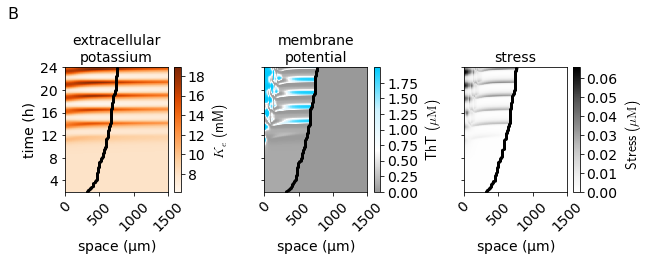

In [16]:
output_dir="electric_sims"
cmap_ThT=mpl.colors.LinearSegmentedColormap.from_list('mycmap2',['#999999','#ffffff','#ccf2ff','#00ccff']) 


tt=24
st=0.05
Ls=200

rs=cmf2018.parse_results_intonumpy_dtype(output_dir=output_dir,basename='out_name',varlist=['c','Ek','tht','s'],dtype='d')

stpoints=np.arange(len(rs[0]))



xticks=np.arange(0,Ls+1,50)
xticklab=['%d'%x for x in xticks*10] #in um
yticklab=np.arange(0,tt+2,4)
yticks=yticklab/st
yticklab=['%d'%x for x in yticklab]
#titles=['extracellular\npotassium','membrane\npotential','intracellular\nglumatame','glutamate\nreceptor', 'stress','potassium channel\nopening probability']
titles=['extracellular\npotassium','membrane\npotential','stress']
fig,axes=plt.subplots(1,3,figsize=(9,3.5),sharey=True)
#fig.suptitle(outdir,y=1.05)

ax=axes[0]
kym=rs[1]
im=ax.imshow(kym,aspect='auto',cmap=plt.cm.Oranges,origin='lower')

cb=plt.colorbar(im,ax=ax)
cb.ax.set_ylabel('$K_e$ (mM)',useTex=True,fontsize=14)
ax.set_title(titles[0],fontsize=14)
ax=axes[1]
kym=rs[2]
ax.set_title(titles[1],fontsize=14)
im=ax.imshow(kym,aspect='auto',cmap=cmap_ThT,origin='lower')
cb=plt.colorbar(im,ax=ax)
cb.ax.set_ylabel('ThT ($\mathrm{\mu M}$)',useTex=True,fontsize=14)

#for i in [3,4,5,6]:
#ax=axes[(i-1)//2][(i-1)%2]
#kym=rs[i]
ax=axes[2]
i=3
kym=rs[i]
im=ax.imshow(kym,aspect='auto',cmap=plt.cm.Greys,origin='lower')
cb=plt.colorbar(im,ax=ax)
cb.ax.set_ylabel('Stress ($\mathrm{\mu M}$)',useTex=True,fontsize=14)
ax.set_title(titles[i-1],fontsize=14)
#for row in axes:
    #for ax in row:
for ax in axes:
    ax.scatter(edges[:,1],np.arange(len(edges[:,1])),color='k',s=2)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklab,rotation=45)
    ax.set_xlabel(r'space ($\mathrm{\mu m}$)')
    ax.set_xlim(0,150)

ax=axes[0]
ax.set_yticks(yticks)
ax.set_yticklabels(yticklab)

ax.set_ylabel('time (h)')
ax.set_ylim([2/st,24/st]) #yticks[-1]])

fig.text(0,1,'B',fontsize=16)
plt.tight_layout()
plt.savefig(os.path.join(figsdir,'kyms_electricG.pdf'),bbox_inches='tight')
plt.show()
#Ek=rs[1][stpoints,edges[:,1]]
#ThT=rs[2][stpoints,edges[:,1]]
#plt.plot(Ek-8,label='Ek')
#plt.plot(ThT,label='ThT')
#plt.legend()
#    plt.show()

GE 30
stopflow=30
Getting c
# 200 480
wall!


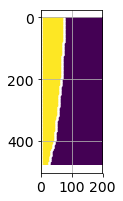

Getting g
# 200 480
Getting gi
# 200 480
Getting Rg
# 200 480
Getting s
# 200 480
Getting nk
# 200 480
Getting Ek
# 200 480
Getting Ik
# 200 480
Getting tht
# 200 480
Getting v
# 200 480
nrows 3


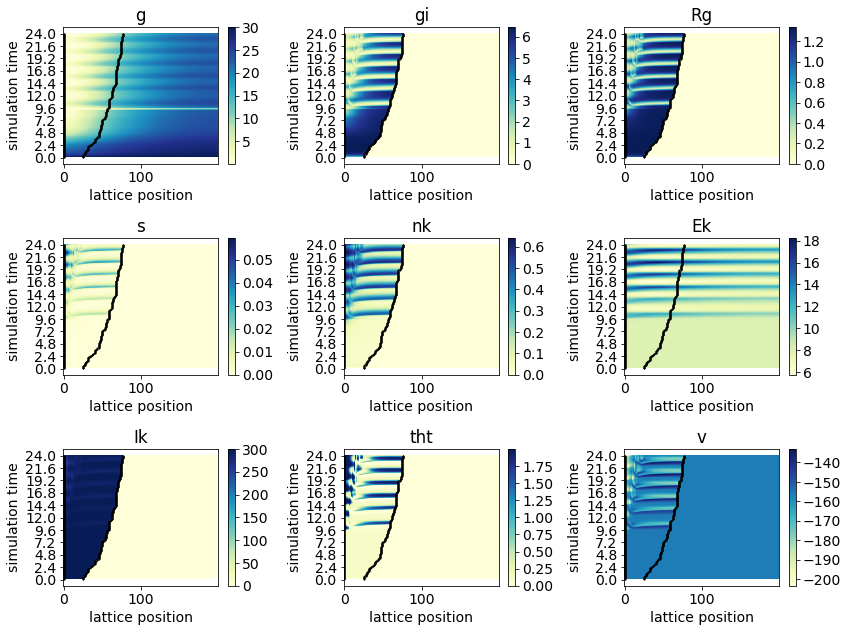

wsize is 200 wsize_h is 100


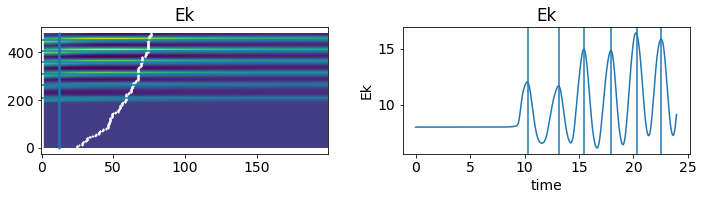

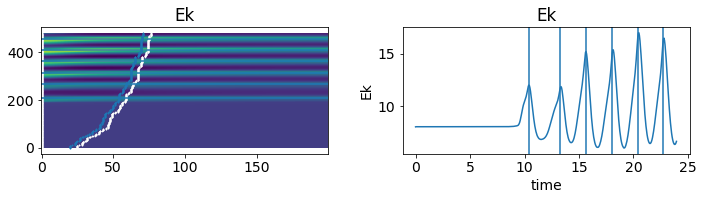

gr 200
gr 200


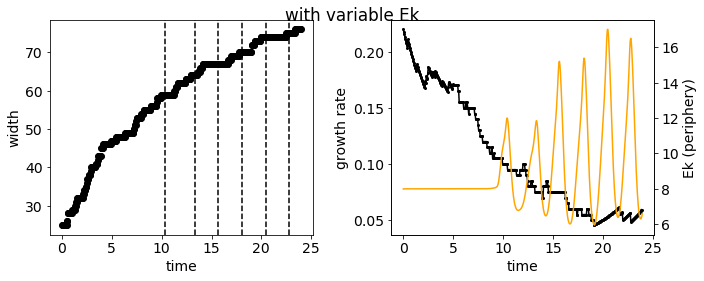

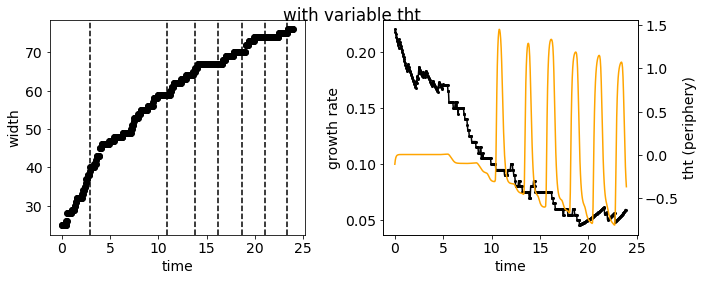

Getting c
# 200 480
Getting Ek
# 200 480
Getting tht
# 200 480
Getting v
# 200 480


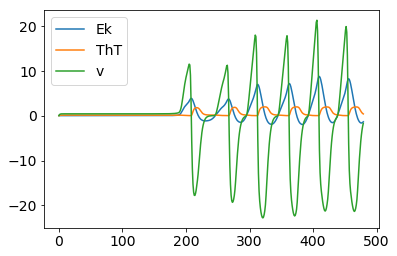

In [8]:
#stop flow 


for GE in [30]:
    print 'GE', GE
    i=1
    Ls=200
    dx=1
    pars_setup={
        "Ls":Ls,
        "Radius1":25,
        "center1":0,
        "Radius2":0,
        "center2":Ls,
        "freeze":0,
        "unfreeze":0.1,
        "freeze2":50,
        "dx":dx,
        "st":0.05,
        "tt":24,
        "zero_tol":0.05,
        "dt":0.000005,
        "read_input":-1.0,
        "tprint":50,
        "seed_":i,
    }
    pars_flow={
        "fl_Gext":5,
        "fl_Ekext":5,
        "K_media":8,
        "GE":GE,
        "stopflow1":9,
        "stopflow2":9.33,
        "tperturbG":50,
        "tperturbK":30,
        "dperturbK":0.05,
        "K_perturb":30,
        "dist_pK":0,
        "GE_perturb":0.5,
    }
    


    pars_list=[('Dg', 36000), ('alpha_gt', 24), ('Kgt', 0.75), ('gv', 1), ('V0', -150), 
               ('delta_g', 4.8), ('g_dg', 0.5), ('Vth_dg', -150), 
               ('S0', 1.12), ('gamma_s', 2.8), ('GS0', 0.2), ('ug', 2),('alpha_sv',0.0),
               ('gl', 18), ('gk', 70), ('dl', 4), ('Vk', 100), ('Vl', -156), 
               ('F', 0.05), ('Dp', 0.12), ('Ikmax', 300), ('Dke', 72000), 
               ('a0', 91), ('Sth', 0.03), ('b', 34), ('mk', 1), 
               ('g_tht', 0.3), ('alpha_t', 20.), ('gamma_t', 10.), ('V0_tht', -165), 
               ('Pgrow', 0.5), ('Gi01', 3), ('Gi02', 0), ('std_ic', 0.001), 
               ('gamma_fl', 0.085), ('gamma_dif', 0.085), ('a_fl', 0.012), ('a_dif', 0.012), 
             ('alpha_Rg', 4.5), ('delta_Rg', 24), ('alpha_rRg', 31), ('Krg', 2.25), ('nrg', 2)]




    pars=dict(pars_list)
    pars.update(pars_setup)
    pars.update(pars_flow)


    infile="parset_electric_stopflow.txt"
    inf=open(infile,"w")
    for pnum in range(len(parlist_names_ordered)):
        parname=parlist_names_ordered[pnum]
        parval=pars[parname]
        print >> inf, "%s %g"%(parname,parval)
    inf.close()


    output_dir=os.path.join("stopflow=%g"%GE)  
    outfile_name="out_name"
    basename=outfile_name
    if not os.path.isdir(output_dir):
        os.mkdir(output_dir)

    ic_dir='ic'
    ic_name='ic_n'
    #ic_dir=""
    #ic_name=""

    toprintinputdir="ic_1"
    if not os.path.isdir(toprintinputdir):
        os.mkdir(toprintinputdir)
    toprintinputdir_name="ic_n1"



    distances=[16]
    dnum=0


    if False:
        inittime=time.time()
        try:
            subp.check_call('./%s %s %s %s %s %s %s %s' %(program_name.strip('.c'), output_dir, outfile_name, ic_dir, ic_name, toprintinputdir, toprintinputdir_name, infile), shell=True)
        except(subp.CalledProcessError) as error:
            wenttonan=(error.returncode==5) #if it went to Nan, it exited with code 5
            if wenttonan:
                print 'went to nan'
            else:
                print 'other things went wrong', error
        print 'done in', time.time()-inittime,'s'



    args={
    'outdir':output_dir,
    'basename':'out_name',
    'st':pars['st'],
    'varlist':None,
    'wsize_tht':200,
    'wsize_gr':200,
    'threshold_Ek':9,
    'color_gr1':'k',
    'color_gr2':'grey',
    'per_int':5, #change if the periphery line is desired at another distance
    'plotkym':True,
    'plotEk':True,
    'plotThT':False}
    print output_dir
    sys.stdout.flush()
    edges, peak_times_d=cmf2018.plot_all(**args)
    plt.show()
    rs=cmf2018.parse_results_intonumpy_dtype(output_dir=output_dir,basename='out_name',varlist=['c','Ek','tht','v'],dtype='d')
    stpoints=np.arange(len(rs[0]))
    Ek=rs[1][stpoints,edges[:,1]]
    ThT=rs[2][stpoints,edges[:,1]]
    v=rs[3][stpoints,edges[:,1]]
    plt.plot(Ek-8,label='Ek')
    plt.plot(ThT,label='ThT')
    plt.plot(v+156,label='v')
    plt.legend()
    plt.show()

./electric_sims
Getting c
# 200 480
wall!


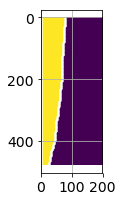

Getting c
# 200 480
Getting Ek
# 200 480
Getting tht
# 200 480
Getting gi
# 200 480
Getting Rg
# 200 480
Getting nk
# 200 480
nrows 2
wsize is 20.0 wsize_h is 10
gr 20.0
gr 20.0


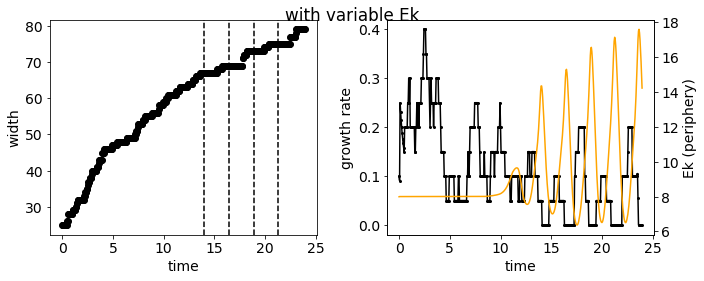

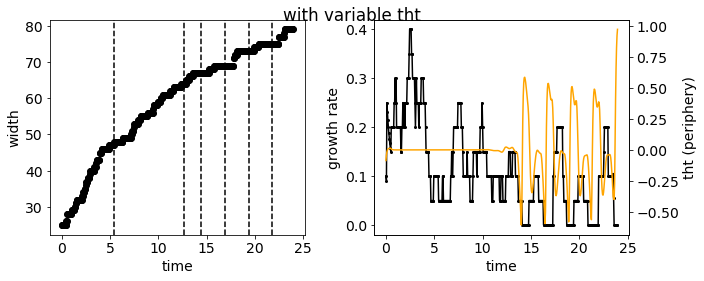

Getting c
# 200 480
Getting Ek
# 200 480
Getting ThT
# 200 480
./stopflow=30
Getting c
# 200 480
wall!


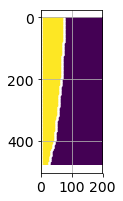

Getting c
# 200 480
Getting Ek
# 200 480
Getting tht
# 200 480
Getting gi
# 200 480
Getting Rg
# 200 480
Getting nk
# 200 480
nrows 2
wsize is 20.0 wsize_h is 10
gr 20.0
gr 20.0


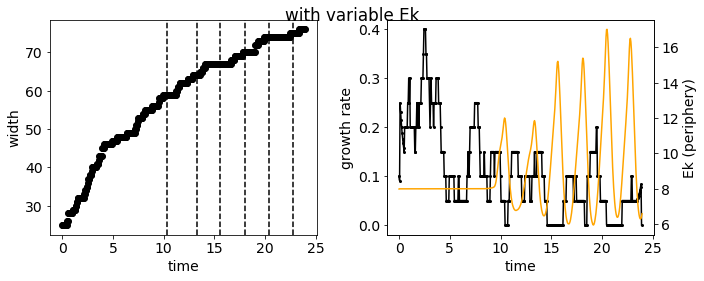

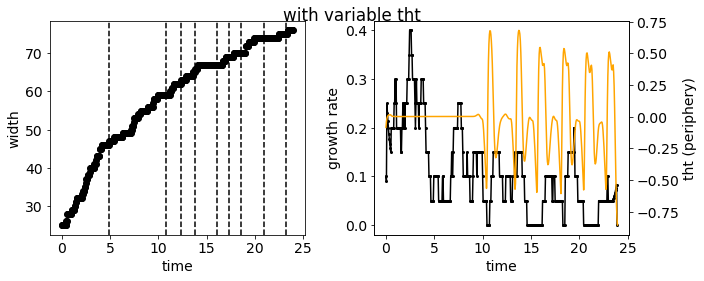

Getting c
# 200 480
Getting Ek
# 200 480
Getting ThT
# 200 480


In [9]:
#now stop-flow

outdir_nsf='electric_sims'
outdir_sf='stopflow=30'
#outdirs=['out_13_WT30','out_65_WT30','out_54_WT15', 'out_58_WT15','out_11_TrkA3','out_27_TrkA3','out_24_GltA','out_60_GltA']

timetraces=[[],[]]
for onum,outdir in enumerate([outdir_nsf,outdir_sf]):
    st=0.05
    Ls=200
    tt=24
    output_dir=os.path.join('./',outdir)
    args={
        'outdir':output_dir,
        'basename':'out_name',
        'st':st,
        'varlist':['c','Ek','tht','gi','Rg','nk'],
        'wsize_tht':1/st,
        'wsize_gr':1/st,
        'threshold_Ek':9,
        'color_gr1':'k',
        'color_gr2':'grey',
        'per_int':5, #change if the periphery line is desired at another distance
        'plotkym':False,
        'plotEk':False,
        'plotThT':False}
    print output_dir
    sys.stdout.flush()
    edges, peak_times_d=cmf2018.plot_all(**args)
    plt.show()
    varlist=['c','Ek','ThT']
    rs=cmf2018.parse_results_intonumpy_dtype(output_dir=output_dir,basename='out_name',varlist=varlist,dtype='d')
    stpoints=np.arange(len(rs[0]))
    Ek=rs[1][stpoints,edges[:,1]-5]
    ThT=rs[2][stpoints,edges[:,1]-5]
    timetraces[onum].extend([Ek,ThT])

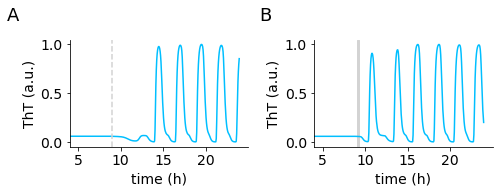

In [15]:
mpl.rcParams['font.size']=14
tt=24
st=0.05
fig,axes=plt.subplots(1,2,figsize=(7,2.5))
timev=np.arange(0,tt,st)
sf0=9
sf1=9.33
for onum in range(2):
    Ek,ThT=timetraces[onum]

    ax=axes[onum]
    #ax.plot(timev,Ek-10,label='Ek')
    ax.plot(timev,(ThT-ThT.min())/(ThT.max()-ThT.min()),label='ThT',color='#00BFFF')
    #ax.set_xtick
    #ax.legend()
    ax.set_xlim([4,25])
   
    if onum==1:
         ax.axvspan(sf0,sf1,color='lightgrey')
    else:
        ax.axvline(sf0,color='lightgrey',linestyle='--')
    ax.set_xlabel('time (h)')
    ax.set_ylabel('ThT (a.u.)')
    ax.set_xticks([5,10,15,20])
    ax.set_yticks([0,0.5,1])
    
    for ax in axes:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')
        
fig.text(0,1,'A',fontsize=18)
fig.text(0.5,1,'B',fontsize=18)
plt.tight_layout()
plt.savefig(os.path.join(figsdir,'stopflow.pdf'),bbox_inches='tight')
plt.show()

In [19]:
#to plot a k pulse

#rs=cmf2018.parse_results_intonumpy_dtype(output_dir=output_dir,basename='out_name',varlist=['c','ThT','s','Ek'],dtype='d')
  
#plot_kpulse([rs[1],rs[2]],st=0.05)